In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터 임포트하기

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


이미지 출력할 때를 위해 별도의 변수 만들어 저장

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

# 데이터 전처리

픽셀 값의 범위가 0~255 이다.

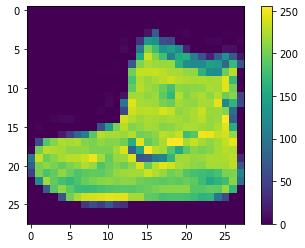

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델 주입 전에 값의 범위를 0~1로 조정

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

훈련세트 처음 25개 이미지 출력

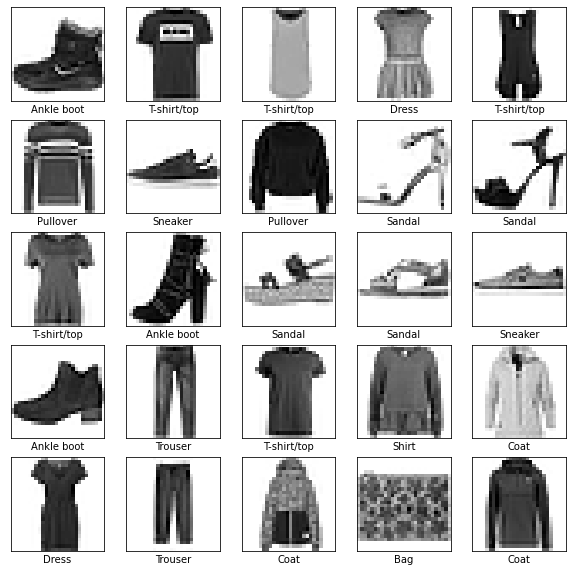

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 2차원배열을 1차원으로 변환
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # 10개의 확률을 반환
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2801 - accuracy: 0.8965
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2688 - accuracy: 0.9002
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2575 - accuracy: 0.9037
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2486 - accuracy: 0.9065
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2400 - accuracy: 0.9103
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2314 - accuracy: 0.9121
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2249 - accuracy: 0.9155
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2187 - accuracy: 0.9173
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2116 - accuracy: 0.9198
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.206

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3537 - accuracy: 0.8821

테스트 정확도: 0.882099986076355


test_images가 test_labels과 맞는지 예측

In [31]:
predictions = model.predict(test_images)

In [32]:
predictions[0]

array([1.6635592e-08, 7.1210772e-12, 2.2086730e-11, 1.1272488e-16,
       7.7863005e-10, 3.3857377e-06, 5.6514585e-11, 3.2556659e-04,
       5.1259881e-09, 9.9967098e-01], dtype=float32)

예측은 1ㅐ개의 숫자 배열로 나타남. 이 값은10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냄

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

# 예측 그래프로 표현하기

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인

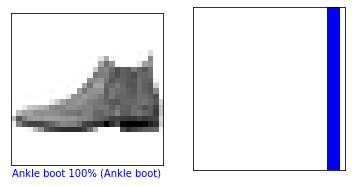

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

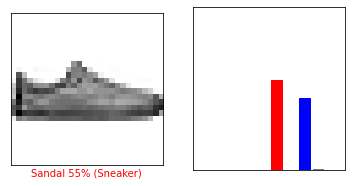

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

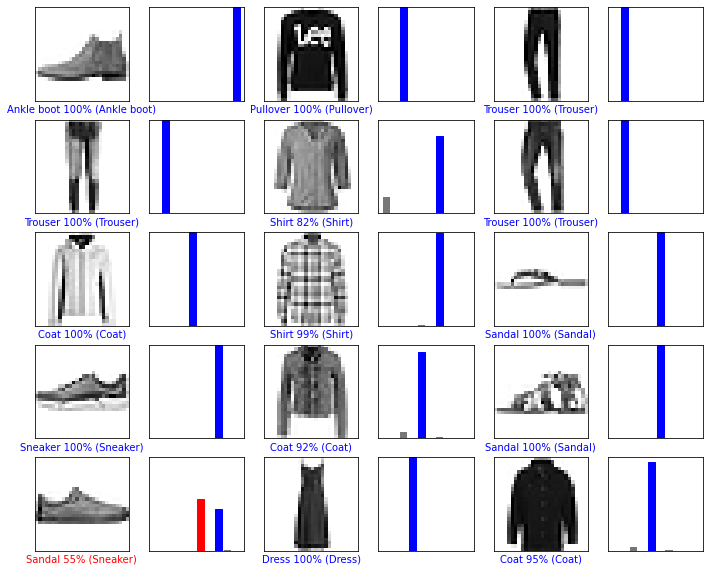

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만들기

In [39]:
img = test_images[0]

print(img.shape)

(28, 28)


하나의 이미지를 사용할 때도 2차원 배열로

In [40]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.6635592e-08 7.1210772e-12 2.2086688e-11 1.1272445e-16 7.7863155e-10
  3.3857441e-06 5.6514477e-11 3.2556721e-04 5.1259974e-09 9.9967098e-01]]


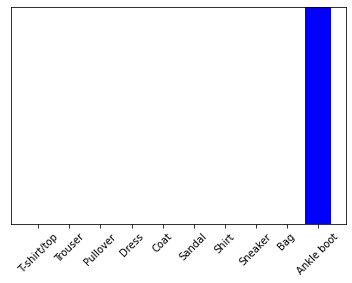

In [42]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [43]:
np.argmax(predictions_single[0])

9